<a href="https://colab.research.google.com/github/jwlee2542/ai-machine/blob/main/week7/1013_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


Task 1

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

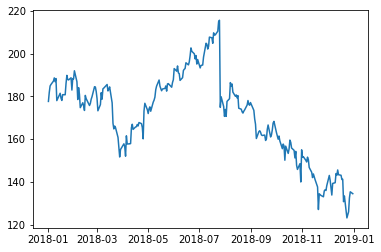

In [67]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

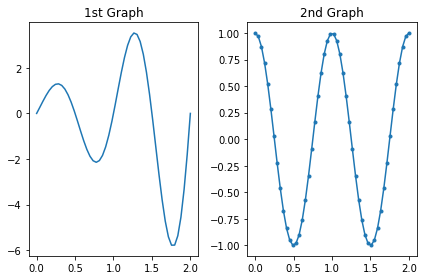

In [68]:
x1 = np.linspace(0.0, 2.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.sin(2 * np.pi * x1) *np.exp(x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(1, 2, 1)                # nrows=1, ncols=2, index=1
plt.plot(x1, y1, '-')
plt.title('1st Graph')

plt.subplot(1, 2, 2)                # nrows=1, ncols=2, index=2
plt.plot(x2, y2, '.-')
plt.title('2nd Graph')

plt.tight_layout()
plt.show()

Task 2

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [70]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

In [71]:
covid.countriesAndTerritories.unique()

array(['Croatia', 'Greece', 'United_Kingdom', 'Azerbaijan', 'Bahrain',
       'Ecuador', 'Japan', 'Singapore', 'Dominican_Republic', 'Romania',
       'Estonia', 'Spain', 'Netherlands', 'Brazil', 'Australia', 'Mexico',
       'Iraq', 'Canada', 'Israel', 'Kuwait', 'Belgium', 'Austria',
       'San_Marino', 'India', 'North_Macedonia', 'Oman', 'Malaysia',
       'Armenia', 'Czechia', 'United_Arab_Emirates', 'Pakistan',
       'Philippines', 'South_Korea', 'Lebanon', 'Sweden', 'Belarus',
       'USA', 'Cambodia', 'Georgia', 'Lithuania', 'Taiwan', 'Italy',
       'Denmark', 'Switzerland', 'Iceland', 'Sri_Lanka', 'Finland',
       'Cases_on_an_international_conveyance_Japan', 'Indonesia',
       'Russia', 'Monaco', 'Nigeria', 'Norway', 'Thailand', 'Qatar',
       'China', 'New_Zealand', 'Germany', 'Luxembourg', 'Vietnam', 'Iran',
       'France', 'Egypt', 'Ireland', 'Nepal', 'Afghanistan', 'Algeria',
       'Morocco', 'Andorra', 'Saudi_Arabia', 'Senegal', 'Portugal',
       'Sint_Maarten', '

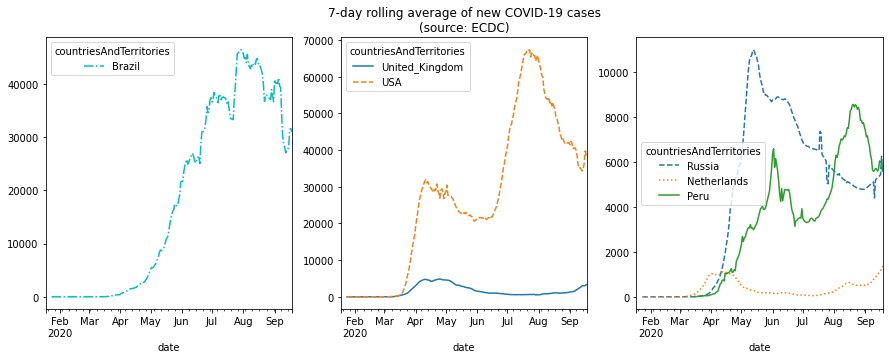

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['Brazil']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['United_Kingdom', 'USA']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Russia', 'Netherlands', 'Peru']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

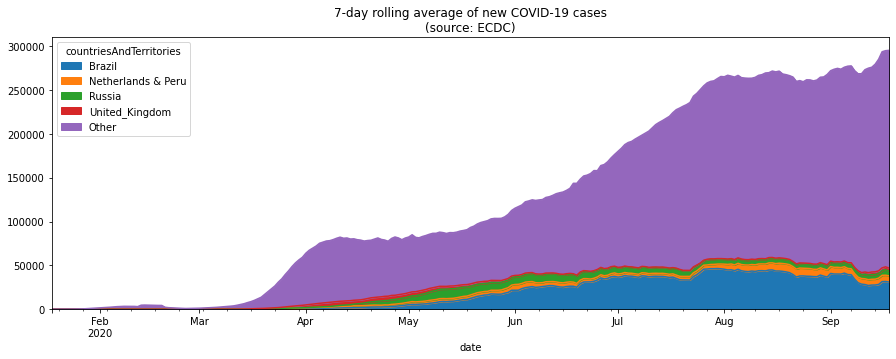

In [73]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['Brazil','United_Kingdom', 'USA ', 'Russia', 'Netherlands & Peru']
    ]

new_cases_rolling_average.assign(
    **{'Netherlands & Peru': lambda x: x.Netherlands + x.Peru}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

Task 3

Text(0, 0.5, 'count')

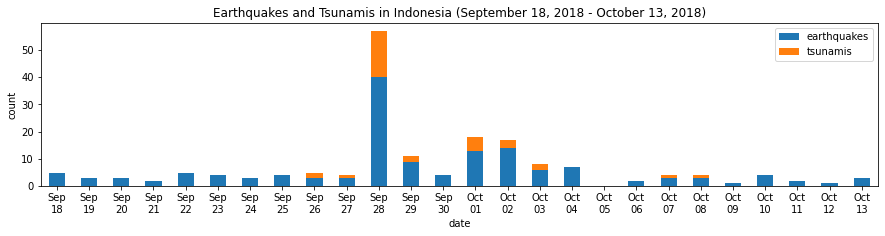

In [98]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')


indonesia_quakes.plot(
    y =['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
          stacked = True
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

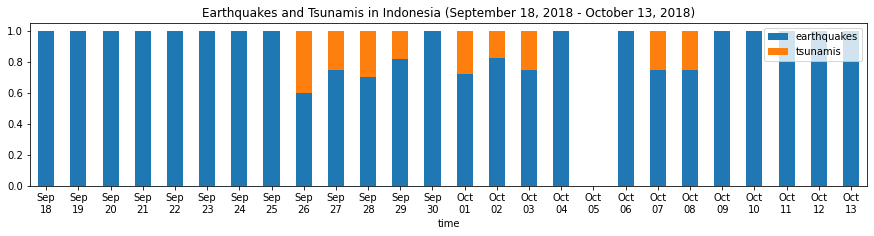

In [104]:
indonesia_quakes[['tsunami', 'earthquake']].apply(lambda x: x / x.sum(), axis=1).plot(
     y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
          stacked = True
)
